<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://raw.githubusercontent.com/Unidata/MetPy/master/src/metpy/plots/_static/unidata_150x150.png" alt="Unidata Logo" style="height: 98px;">
</div>

<h1>Let's Do Some Meteorology - Isentropic Analysis</h1>

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

### Overview

In the previous notebook, we covered some of the basics of Python, with three key takeaways:

- **NumPy** deals with arrays
- **Matplotlib** deals with basic plotting
- **Cartopy** deals with maps

Here, we build on this foundation to do some meteorological analysis! Isentropic analysis to be specific. To do so, we'll be covering some more *very useful* packages:

- **xarray** is arrays + coordinates/metadata, with lots of helpers
- **Pint** is unit-aware arrays
- **Siphon** helps get remote data
- **MetPy** is a general toolbox for meteorological files, calculations, and plotting

### Objectives
1. <a href="#Intro-to-xarray">Intro to xarray</a>
1. <a href="#Intro-to-Pint">Intro to Pint</a>
1. <a href="#Using-Siphon-to-Get-Our-Data">Using Siphon to Get Our Data</a>
1. <a href="#Preparing-and-Previewing-Our-Data">Preparing and Previewing Our Data</a>
1. <a href="#Isentropic-Interpolation">Insentropic Interpolation</a>
1. <a href="#Isentropic-Ascent">Insentropic Ascent</a>

## Intro to xarray

[xarray](http://xarray.pydata.org/en/latest/index.html) streamlines working with arrays of physical data by providing labeled dimensions/coordinates, metadata, collections of related variables, and many utilties to make use of these additions. There are two key objects to keep in mind:

- **DataArray**: an array with attached coordinates and metadata
- **Dataset**: a collection of DataArrays on the same (or related coordinates)

But what does this actually look like? Let's load up an example dataset:

In [1]:
import xarray as xr

ds = xr.tutorial.load_dataset('air_temperature')

ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.49 296.19 295.69
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

Note the sections of this printout:

- **Dimensions**: string labels, instead of numbered axes like NumPy arrays
- **Coordinates**: arrays that provide axis labels for each the dimensions (or subsets of dimensions)
- **Data variables**: our physical data
- **Attributes**: metadata dictionary

While not directly cooresponding to this example dataset, the following image (from the xarray documentation) helps to illustrate these concepts:

<img src="http://xarray.pydata.org/en/latest/_images/dataset-diagram.png" style="max-height: 200px;">

If we want our air temperature DataArray, we can look at the following:

In [2]:
temperature = ds['air']
temperature

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[241.2    , 242.5    , 243.5    , ..., 232.79999, 235.5    ,
         238.59999],
        [243.79999, 244.5    , 244.7    , ..., 232.79999, 235.29999,
         239.29999],
        [250.     , 249.79999, 248.89   , ..., 233.2    , 236.39   ,
         241.7    ],
        ...,
        [296.6    , 296.19998, 296.4    , ..., 295.4    , 295.1    ,
         294.69998],
        [295.9    , 296.19998, 296.79   , ..., 295.9    , 295.9    ,
         295.19998],
        [296.29   , 296.79   , 297.1    , ..., 296.9    , 296.79   ,
         296.6    ]],

       [[242.09999, 242.7    , 243.09999, ..., 232.     , 233.59999,
         235.79999],
        [243.59999, 244.09999, 244.2    , ..., 231.     , 232.5    ,
         235.7    ],
        [253.2    , 252.89   , 252.09999, ..., 230.79999, 233.39   ,
         238.5    ],
        ...,
        [296.4    , 295.9    , 296.19998, ..., 295.4    , 295.1    ,
         294.79   ],
        [296.19998, 296.69998, 296.79   , ..., 295.6    , 295.5    ,
         295.1    ],
        [296.29   , 297.19998, 297.4    , ..., 296.4    , 296.4    ,
         296.6    ]],

       [[242.29999, 242.2    , 242.29999, ..., 234.29999, 236.09999,
         238.7    ],
        [244.59999, 244.39   , 244.     , ..., 230.29999, 232.     ,
         235.7    ],
        [256.19998, 255.5    , 254.2    , ..., 231.2    , 233.2    ,
         238.2    ],
        ...,
        [295.6    , 295.4    , 295.4    , ..., 296.29   , 295.29   ,
         295.     ],
        [296.19998, 296.5    , 296.29   , ..., 296.4    , 296.     ,
         295.6    ],
        [296.4    , 296.29   , 296.4    , ..., 297.     , 297.     ,
         296.79   ]],

       ...,

       [[243.48999, 242.98999, 242.09   , ..., 244.18999, 244.48999,
         244.89   ],
        [249.09   , 248.98999, 248.59   , ..., 240.59   , 241.29   ,
         242.68999],
        [262.69   , 262.19   , 261.69   , ..., 239.39   , 241.68999,
         245.18999],
        ...,
        [294.79   , 295.29   , 297.49   , ..., 295.49   , 295.38998,
         294.69   ],
        [296.79   , 297.88998, 298.29   , ..., 295.49   , 295.49   ,
         294.79   ],
        [298.19   , 299.19   , 298.79   , ..., 296.09   , 295.79   ,
         295.79   ]],

       [[245.79   , 244.79   , 243.48999, ..., 243.29   , 243.98999,
         244.79   ],
        [249.89   , 249.29   , 248.48999, ..., 241.29   , 242.48999,
         244.29   ],
        [262.38998, 261.79   , 261.29   , ..., 240.48999, 243.09   ,
         246.89   ],
        ...,
        [293.69   , 293.88998, 295.38998, ..., 295.09   , 294.69   ,
         294.29   ],
        [296.29   , 297.19   , 297.59   , ..., 295.29   , 295.09   ,
         294.38998],
        [297.79   , 298.38998, 298.49   , ..., 295.69   , 295.49   ,
         295.19   ]],

       [[245.09   , 244.29   , 243.29   , ..., 241.68999, 241.48999,
         241.79   ],
        [249.89   , 249.29   , 248.39   , ..., 239.59   , 240.29   ,
         241.68999],
        [262.99   , 262.19   , 261.38998, ..., 239.89   , 242.59   ,
         246.29   ],
        ...,
        [293.79   , 293.69   , 295.09   , ..., 295.29   , 295.09   ,
         294.69   ],
        [296.09   , 296.88998, 297.19   , ..., 295.69   , 295.69   ,
         295.19   ],
        [297.69   , 298.09   , 298.09   , ..., 296.49   , 296.19   ,
         295.69   ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.

Why does all of this matter? Because now we can do things with this data! For example, selection:

In [3]:
# Time strings are automatically parsed
temperature.sel(time='2014-01-12 00:00')

<xarray.DataArray 'air' (lat: 25, lon: 53)>
array([[249.2    , 249.5    , 249.7    , ..., 241.29999, 241.89   ,
        243.29999],
       [251.09999, 252.59999, 253.59999, ..., 241.5    , 244.5    ,
        248.7    ],
       [252.     , 252.2    , 252.09999, ..., 246.39   , 250.7    ,
        256.     ],
       ...,
       [297.29   , 296.69998, 297.1    , ..., 294.69998, 294.19998,
        293.9    ],
       [297.4    , 297.9    , 298.     , ..., 294.79   , 294.29   ,
        293.9    ],
       [297.79   , 298.19998, 298.29   , ..., 295.79   , 295.6    ,
        295.4    ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2014-01-12
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [4]:
# Can select the nearest point, rather than exact point as well
temperature.sel(lat=42.345, lon=288.954, method='nearest')

<xarray.DataArray 'air' (time: 2920)>
array([274.9    , 276.4    , 276.     , ..., 268.88998, 268.79   ,
       270.69   ], dtype=float32)
Coordinates:
    lat      float32 42.5
    lon      float32 290.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [5]:
# Want to get a range of values? Use slice
temperature.sel(time=slice('2014-01-12 00:00', '2014-01-17 00:00')).sel(lat=42.345, lon=288.954, method='nearest')

<xarray.DataArray 'air' (time: 21)>
array([285.5    , 281.5    , 279.19998, 278.79   , 278.19998, 276.29   ,
       276.     , 278.5    , 280.4    , 280.9    , 282.     , 281.29   ,
       281.69998, 277.79   , 276.4    , 277.9    , 278.29   , 277.19998,
       275.5    , 277.29   , 276.9    ], dtype=float32)
Coordinates:
    lat      float32 42.5
    lon      float32 290.0
  * time     (time) datetime64[ns] 2014-01-12 2014-01-12T06:00:00 ... 2014-01-17
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

or, instead of selecting, how about interpolating?

In [6]:
temperature.interp(lat=42.345, lon=288.954, method='linear')

<xarray.DataArray 'air' (time: 2920)>
array([274.37083565, 275.5262647 , 274.75175989, ..., 268.22487063,
       268.04640978, 269.94113608])
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
    lat      float64 42.34
    lon      float64 289.0
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

or doing some computations?

In [7]:
# A time series of domain-maximum temperature
temperature.max(('lat', 'lon'))

<xarray.DataArray 'air' (time: 2920)>
array([302.6    , 302.6    , 302.9    , ..., 301.49   , 302.59   ,
       302.38998], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

In [8]:
# A 2013 domain climotology
temperature.sel(time='2013').mean('time')

<xarray.DataArray 'air' (lat: 25, lon: 53)>
array([[259.44156, 259.285  , 258.999  , ..., 250.36452, 251.54161,
        253.06728],
       [262.01508, 262.09573, 262.0309 , ..., 249.32791, 251.13004,
        253.86029],
       [264.3173 , 263.86008, 263.536  , ..., 249.89613, 252.80139,
        256.87732],
       ...,
       [297.48215, 296.7184 , 296.30655, ..., 296.99503, 296.49896,
        296.05005],
       [297.86642, 297.62842, 297.14444, ..., 297.11392, 297.0313 ,
        296.72452],
       [298.09085, 298.08618, 297.82483, ..., 297.61917, 297.55002,
        297.57053]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0

or, some quick "preview-style" plots?

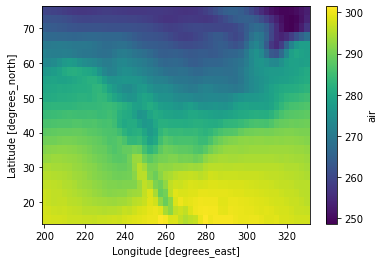

In [9]:
%matplotlib inline

# Let's plot that climotology from before
temperature.sel(time='2013').mean('time').plot()

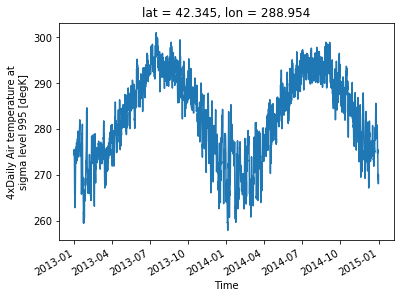

In [10]:
# And an interpolated time series
temperature.interp(lat=42.345, lon=288.954, method='linear').plot()

or, we can get really fancy with xarray's groupby operations

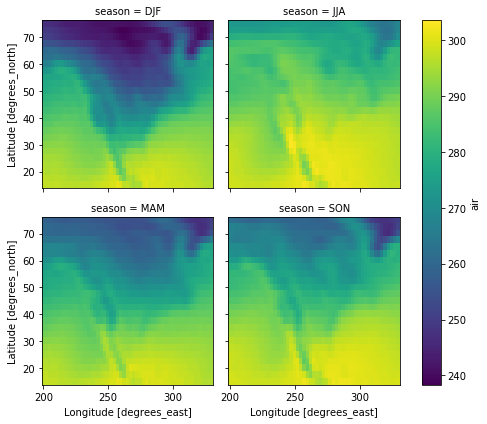

In [11]:
# Seasonally-averaged temperatures
temperature.groupby('time.season').mean('time').plot(col='season', col_wrap=2)

## Intro to Pint

This one will be brief, since the main advantage is that once your arrays are created with units, you don't have to worry about them! (And, we'll be going over it more later.)

But, to give the basic idea, take a look at the below examples:

In [12]:
import numpy as np
from metpy.units import units  # We are using MetPy's registry, but you can use pint directly as well

np.linspace(0, 1, 5) * units.m

array([0.  , 0.25, 0.5 , 0.75, 1.  ]) <Unit('meter')>

In [13]:
# Computations work out as you may expect
F = 500 * units.N
m = 10 * units('kilogram')
a = F / m
print(a)
print(a.to_base_units())  # Note that reduction does not occur by default
print(a.to('ft / s**2'))  # Why would you ever not use metric?!?! Just kidding...you can use whatever units you so desire.

50.0 newton / kilogram
50.0 meter / second ** 2
164.04199475065616 foot / second ** 2


One "gotcha": in notebooks, Pint tries fancily rendering your arrays, but this freezes JupyterLab when they are large. So, when in doubt, always use print!

In [14]:
print(units.Quantity(np.linspace(0, 10, 1e4).reshape((100, 100)), 'degC'))

[[0.0 0.001000100010001 0.002000200020002 ... 0.09700970097009701  0.09800980098009801 0.09900990099009901] [0.1000100010001 0.10101010101010101 0.10201020102010201 ...  0.19701970197019703 0.19801980198019803 0.19901990199019903] [0.2000200020002 0.201020102010201 0.20202020202020202 ...  0.297029702970297 0.298029802980298 0.299029902990299] ... [9.700970097009701 9.701970197019701 9.702970297029703 ...  9.797979797979798 9.798979897989799 9.7999799979998] [9.8009800980098 9.801980198019802 9.802980298029803 ...  9.897989798979898 9.8989898989899 9.8999899989999] [9.900990099009901 9.901990199019902 9.902990299029904 ...  9.997999799979999 9.998999899989998 10.0]] degree_Celsius


One other "gotcha": temperature units (like degrees Celcius and Farenheit) are "offset" or "non-multiplicative" units, meaning that adding them or multiplying them doesn't make physical sense. So, pint will raise an error:

In [15]:
T = 68 * units.degF
T + 10 * units.degC

OffsetUnitCalculusError: Ambiguous operation with offset unit (degree_Fahrenheit, degree_Celsius). See https://pint.readthedocs.io/en/latest/nonmult.html for guidance.

Instead, use a non-offset unit (kelvin), or the corresponding delta unit:

In [16]:
T + 10 * units.delta_degC

86.0 <Unit('degree_Fahrenheit')>

## Using Siphon to Get Our Data

Now, we shift gears towards our actual isentropic analysis. The first part of this is getting the data, for which we will use [Siphon](https://unidata.github.io/siphon/latest/index.html).

Our data will be from the latest run of the GFS available on Unidata's THREDDS data server. First we access the catalog for the half-degree GFS output, and look for the dataset called the "Best GFS Half Degree Forecast Time Series". This dataset combines multiple sets of model runs to yield a time series of output with the shortest forecast offset.

In [17]:
from siphon.catalog import TDSCatalog

cat = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/grib/'
                 'NCEP/GFS/Global_0p5deg/catalog.xml')
best = cat.datasets['Best GFS Half Degree Forecast Time Series']

Next, we set up access to request subsets of data from the model. This uses the NetCDF Subset Service (NCSS) to make requests and get results in netCDF format.

In [18]:
subset_access = best.subset()
query = subset_access.query()

Let's see what variables are available. Instead of just printing `subset_access.variables`, we can ask Python to only display variables that end with "isobaric", which is how the TDS denotes GRIB fields that are specified on isobaric levels.

In [19]:
sorted(v for v in subset_access.variables if v.endswith('isobaric'))

['5-Wave_Geopotential_Height_isobaric',
 'Absolute_vorticity_isobaric',
 'Cloud_mixing_ratio_isobaric',
 'Geopotential_height_isobaric',
 'Graupel_snow_pellets_isobaric',
 'Ice_water_mixing_ratio_isobaric',
 'Icing_severity_isobaric',
 'Ozone_Mixing_Ratio_isobaric',
 'Rain_mixing_ratio_isobaric',
 'Relative_humidity_isobaric',
 'Snow_mixing_ratio_isobaric',
 'Temperature_isobaric',
 'Total_cloud_cover_isobaric',
 'Vertical_velocity_geometric_isobaric',
 'Vertical_velocity_pressure_isobaric',
 'u-component_of_wind_isobaric',
 'v-component_of_wind_isobaric']

Now we put together the "query"--the way we ask for data we want. We give ask for a wide box of data over the U.S. for the time step that's closest to now. We also request temperature, height, winds, and relative humidity. By asking for netCDF4 data, the result is compressed, so the download is smaller.

In [20]:
from datetime import datetime
query.time(datetime.utcnow())
query.variables('Temperature_isobaric', 'Geopotential_height_isobaric',
                'u-component_of_wind_isobaric', 'v-component_of_wind_isobaric',
                'Relative_humidity_isobaric')
query.lonlat_box(west=-130, east=-50, south=10, north=60)
query.accept('netcdf4')

var=u-component_of_wind_isobaric&var=Relative_humidity_isobaric&var=Temperature_isobaric&var=v-component_of_wind_isobaric&var=Geopotential_height_isobaric&time=2020-01-09T15%3A40%3A43.783225&west=-130&east=-50&south=10&north=60&accept=netcdf4

Now all that's left is to actually make the request for data:

In [21]:
nc = subset_access.get_data(query)

Open the returned netCDF data using xarray:

In [22]:
from xarray.backends import NetCDF4DataStore
import xarray as xr
ds = xr.open_dataset(NetCDF4DataStore(nc))

## Preparing and Previewing Our Data

Let's take a closer look at the dataset we obtained, and prepare it for our analysis

In [23]:
ds

<xarray.Dataset>
Dimensions:                       (isobaric: 31, isobaric6: 34, lat: 101, lon: 161, time: 1)
Coordinates:
    reftime                       (time) datetime64[ns] ...
  * time                          (time) datetime64[ns] 2020-01-09T15:00:00
  * isobaric                      (isobaric) float32 100.0 200.0 ... 100000.0
  * lat                           (lat) float32 60.0 59.5 59.0 ... 10.5 10.0
  * lon                           (lon) float32 230.0 230.5 ... 309.5 310.0
  * isobaric6                     (isobaric6) float32 40.0 100.0 ... 100000.0
Data variables:
    u-component_of_wind_isobaric  (time, isobaric, lat, lon) float32 ...
    LatLon_Projection             int32 ...
    Relative_humidity_isobaric    (time, isobaric, lat, lon) float32 ...
    Temperature_isobaric          (time, isobaric6, lat, lon) float32 ...
    v-component_of_wind_isobaric  (time, isobaric, lat, lon) float32 ...
    Geopotential_height_isobaric  (time, isobaric6, lat, lon) float32 ...
Attributes:
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    Conventions:                                                             ...
    history:                                                                 ...
    featureType:                                                             ...
    History:                                                                 ...
    geospatial_lat_min:                                                      ...
    geospatial_lat_max:                                                      ...
    geospatial_lon_min:                                                      ...
    geospatial_lon_max:                                                      ...

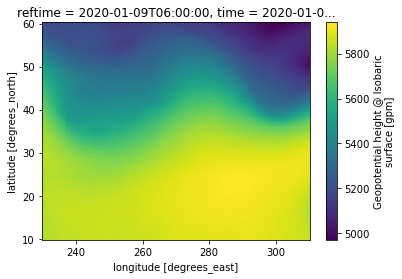

In [24]:
# Quick preview of 500-hPa heights
ds['Geopotential_height_isobaric'].metpy.sel(vertical=500 * units.hPa).squeeze().plot()

Let's use MetPy's CF parsing to get our projection information, and reduce the size-one time dimension while we're at it

In [25]:
ds = ds.metpy.parse_cf().squeeze()
ds

<xarray.Dataset>
Dimensions:                       (isobaric: 31, isobaric6: 34, lat: 101, lon: 161)
Coordinates:
    reftime                       datetime64[ns] 2020-01-09T06:00:00
    time                          datetime64[ns] 2020-01-09T15:00:00
  * isobaric                      (isobaric) float32 100.0 200.0 ... 100000.0
  * lat                           (lat) float32 60.0 59.5 59.0 ... 10.5 10.0
  * lon                           (lon) float32 230.0 230.5 ... 309.5 310.0
    crs                           object Projection: latitude_longitude
  * isobaric6                     (isobaric6) float32 40.0 100.0 ... 100000.0
Data variables:
    u-component_of_wind_isobaric  (isobaric, lat, lon) float32 ...
    LatLon_Projection             int32 ...
    Relative_humidity_isobaric    (isobaric, lat, lon) float32 ...
    Temperature_isobaric          (isobaric6, lat, lon) float32 ...
    v-component_of_wind_isobaric  (isobaric, lat, lon) float32 ...
    Geopotential_height_isobaric  (isobaric6, lat, lon) float32 ...
Attributes:
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    Conventions:                                                             ...
    history:                                                                 ...
    featureType:                                                             ...
    History:                                                                 ...
    geospatial_lat_min:                                                      ...
    geospatial_lat_max:                                                      ...
    geospatial_lon_min:                                                      ...
    geospatial_lon_max:                                                      ...

Let's also pull out the fields to some shorter variable names

In [26]:
# Need to adjust units on humidity because '%' causes problems
# CAN REMOVE WITH METPY V1.0 AND PINT V0.10
ds['Relative_humidity_isobaric'].attrs['units'] = 'percent'

# Fields
temperature = ds['Temperature_isobaric']
rh = ds['Relative_humidity_isobaric']
height = ds['Geopotential_height_isobaric']
u = ds['u-component_of_wind_isobaric']
v = ds['v-component_of_wind_isobaric']

# Coordinate data
data_proj = temperature.metpy.cartopy_crs
pressure, lat, lon = temperature.metpy.coordinates('vertical', 'latitude', 'longitude')

# Can have different vertical levels for wind and thermodynamic variables, so
# find and select the common levels
common_levels = np.intersect1d(pressure, u.metpy.vertical)
temperature = temperature.metpy.sel(vertical=common_levels)
u = u.metpy.sel(vertical=common_levels)
v = v.metpy.sel(vertical=common_levels)
pressure = pressure.metpy.sel(vertical=common_levels)

# Convert units on pressure to hPa
pressure.metpy.convert_units('hPa')

One final preview: an isentropic cross section (just to see the result, we won't go into the code in detail...see https://unidata.github.io/MetPy/dev/examples/cross_section.html if interested)

In [27]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

import metpy.calc as mpcalc
from metpy.interpolate import cross_section

In [28]:
# Define start and end points
start = (34.6, -86.8)
end = (46.0, -65.1)

In [29]:
# Obtain raw cross section fields
(height_cross, temperature_cross, rh_cross,
 u_cross, v_cross) = (cross_section(field, start, end)
                      for field in (height, temperature, rh, u, v))

In [30]:
# Calculate our additional cross section fields

# TODO: REPLACE OLD BLOCK WITH NEW ONCE METPY V1.0 IS RELEASED

# OLD
theta_cross = mpcalc.potential_temperature(pressure.metpy.unit_array[:, None], temperature_cross)
theta_cross = xr.DataArray(theta_cross,
                           coords=temperature_cross.coords,
                           dims=temperature_cross.dims,
                           attrs={'units': str(theta_cross.units)})

# NEW
# theta_cross = mpcalc.potential_temperature(pressure, temperature_cross)

t_wind, n_wind = mpcalc.cross_section_components(u_cross, v_cross)
t_wind.metpy.convert_units('knots')
n_wind.metpy.convert_units('knots')

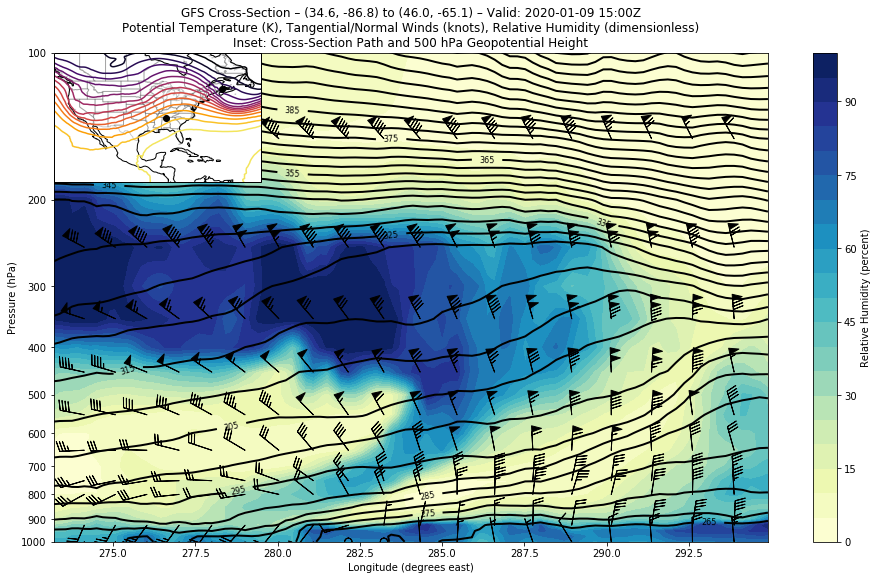

In [31]:
# Define the figure object and primary axes
fig = plt.figure(1, figsize=(16., 9.))
ax = plt.axes()

# Plot RH using contourf
rh_contour = ax.contourf(rh_cross.metpy.longitude, pressure, rh_cross,
                         levels=np.arange(0, 105, 5), cmap='YlGnBu')
rh_colorbar = fig.colorbar(rh_contour)

# Plot potential temperature using contour, with some custom labeling
theta_contour = ax.contour(theta_cross.metpy.longitude, pressure, theta_cross,
                           levels=np.arange(250, 450, 5), colors='k', linewidths=2)
theta_contour.clabel(theta_contour.levels[1::2], fontsize=8, colors='k', inline=1,
                     inline_spacing=8, fmt='%i', rightside_up=True, use_clabeltext=True)

# Plot winds using the axes interface directly, with some custom indexing to make the barbs
# less crowded
wind_slc_vert = list(range(0, 9)) + list(range(9, 24, 2)) + list(range(24, 31, 3))
wind_slc_horz = slice(5, 100, 5)
ax.barbs(t_wind.metpy.longitude[wind_slc_horz],
         pressure[wind_slc_vert],
         t_wind[wind_slc_vert, wind_slc_horz],
         n_wind[wind_slc_vert, wind_slc_horz], color='k')

# Adjust the y-axis to be logarithmic
ax.set_yscale('symlog')
ax.set_yticklabels(np.arange(1000, 50, -100))
ax.set_ylim(pressure.max(), max(pressure.min(), 100))
ax.set_yticks(np.arange(1000, 50, -100))

# Define inset axes
ax_inset = fig.add_axes([0.115, 0.68, 0.20, 0.20], projection=data_proj)

# Plot geopotential height at 500 hPa using xarray's contour wrapper
ax_inset.contour(height.metpy.x, height.metpy.y, height.metpy.sel(vertical=500 * units.hPa),
                 levels=np.arange(5100, 6000, 60), cmap='inferno')

# Plot the path of the cross section
endpoints = data_proj.transform_points(ccrs.Geodetic(),
                                       *np.vstack([start, end]).transpose()[::-1])
ax_inset.scatter(endpoints[:, 0], endpoints[:, 1], c='k', zorder=2)
ax_inset.plot(height_cross.metpy.longitude, height_cross.metpy.longitude, c='k', zorder=2, transform=ccrs.PlateCarree())

# Add geographic features
ax_inset.coastlines()
ax_inset.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='k', alpha=0.2, zorder=0)

# Set the titles and axes labels
ax_inset.set_title('')
ax.set_title('GFS Cross-Section \u2013 {} to {} \u2013 Valid: {}\n'
             'Potential Temperature (K), Tangential/Normal Winds (knots), '
             'Relative Humidity (dimensionless)\n'
             'Inset: Cross-Section Path and 500 hPa Geopotential Height'.format(
                 start, end, rh_cross.metpy.time.dt.strftime('%Y-%m-%d %H:%MZ').item()))
ax.set_ylabel('Pressure (hPa)')
ax.set_xlabel('Longitude (degrees east)')
rh_colorbar.set_label('Relative Humidity (percent)')

plt.show()

## Isentropic Interpolation

Now let's take what we've downloaded, and use it to make an isentropic map. In this case, we're interpolating from one vertical coordinate, pressure, to another: potential temperature. MetPy has a function `isentropic_interpolation` that can do this for us.

At a minimum, this must be given one or more isentropic levels, the 3-D temperature field, and the pressure levels of the original field; it then returns the 3D array of pressure values (2D slices for each isentropic level). You can also pass additional fields to be interpolated to these levels. Below, we interpolate the winds (and pressure) to the 320K isentropic level:

In [32]:
isen_level = np.array([320]) * units.kelvin
isen_press, isen_u, isen_v = mpcalc.isentropic_interpolation(isen_level, pressure,
                                                             temperature, u, v)

In [33]:
# Need to squeeze() out the size-1 dimension for the isentropic level
isen_press = isen_press.squeeze()
isen_u = isen_u.squeeze()
isen_v = isen_v.squeeze()

In [34]:
# Note the output type:
print(isen_press)

[[274.5260009765625 274.0914306640625 274.0875244140625 ...  266.0618591308594 265.5469055175781 264.8291015625] [275.19024658203125 275.5698547363281 275.9949645996094 ...  263.29437255859375 261.60992431640625 260.920654296875] [277.24932861328125 277.38946533203125 276.7564392089844 ...  260.625732421875 260.26983642578125 259.2041320800781] ... [569.1046142578125 571.5387573242188 570.4119262695312 ...  578.6294555664062 575.2591552734375 573.867431640625] [571.088134765625 571.70556640625 569.73681640625 ... 580.8716430664062  576.197998046875 573.0546875] [574.56591796875 570.0240478515625 572.3601684570312 ...  582.7005615234375 581.2183837890625 579.4389038085938]] hectopascal


Let's plot the results and see what it looks like, along with some moisture data:

* Calculating the mixing ratio (using the appropriate function from `mpcalc`)
* Call `isentropic_interpolation` with mixing ratio like the above
* `contour` (in green) or `contourf` the moisture data on the map alongside pressure

You'll can refer to the [MetPy API documentation](https://unidata.github.io/MetPy/latest/api/index.html) for more details on the available calculation functions.

/home/jon/miniconda3/envs/pyaos-ams-2020/lib/python3.7/site-packages/metpy/interpolate/one_dimension.py:147: UserWarning: Interpolation point out of data bounds encountered
  warnings.warn('Interpolation point out of data bounds encountered')
/home/jon/miniconda3/envs/pyaos-ams-2020/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1833: RuntimeWarning: invalid value encountered in less
  u, v = self.projection.transform_vectors(t, x, y, u, v)
/home/jon/miniconda3/envs/pyaos-ams-2020/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1833: RuntimeWarning: invalid value encountered in greater
  u, v = self.projection.transform_vectors(t, x, y, u, v)


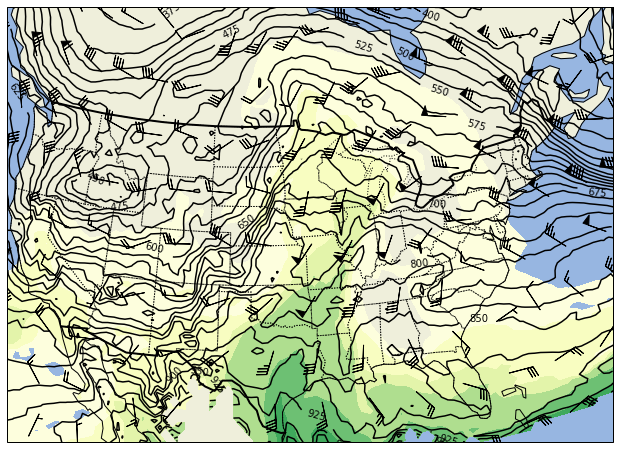

In [35]:
# Needed to make numpy broadcasting work between 1D pressure and other 3D arrays
# Use .metpy.unit_array to get numpy array with units rather than xarray DataArray
pressure_for_calc = pressure.metpy.unit_array[:, None, None]  

# Calculate mixing ratio using something from mpcalc
mixing = mpcalc.mixing_ratio_from_relative_humidity(rh, temperature, pressure_for_calc)


# Take the return and convert manually to units of 'dimenionless'
mixing.ito('dimensionless')


# Interpolate all the data
isen_level = np.array([295]) * units.kelvin
ret = mpcalc.isentropic_interpolation(isen_level, pressure, temperature, mixing, u, v)
isen_press, isen_mixing, isen_u, isen_v = ret


# Squeeze the returned arrays
isen_press = isen_press.squeeze()
isen_mixing = isen_mixing.squeeze()
isen_u = isen_u.squeeze()
isen_v = isen_v.squeeze()


# Create Plot -- same as before
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal(central_longitude=-100))

levels = np.arange(300, 1000, 25)
cntr = ax.contour(lon, lat, isen_press, transform=data_proj,
                  colors='black', levels=levels)
cntr.clabel(fmt='%d')


lon_slice = slice(None, None, 8)
lat_slice = slice(None, None, 8)
ax.barbs(lon[lon_slice], lat[lat_slice],
         isen_u[lat_slice, lon_slice].to('knots').magnitude,
         isen_v[lat_slice, lon_slice].to('knots').magnitude,
         transform=data_proj, zorder=2)


# Contourf the mixing ratio values
mixing_levels = [0.001, 0.002, 0.004, 0.006, 0.010, 0.012, 0.014, 0.016, 0.020]
ax.contourf(lon, lat, isen_mixing, transform=data_proj,
            levels=mixing_levels, cmap='YlGn')


ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linewidth=2)
ax.add_feature(cfeature.STATES, linestyle=':')


ax.set_extent((-120, -70, 25, 55), crs=data_proj)

## Isentropic Ascent

Air flow across isobars on an isentropic surface represents vertical motion. We can use MetPy to calculate this ascent for us.

Since calculating this involves taking derivatives, first let's smooth the input fields using a gaussian_filter.

In [36]:
isen_press = mpcalc.smooth_gaussian(isen_press.squeeze(), 9)
isen_u = mpcalc.smooth_gaussian(isen_u.squeeze(), 9)
isen_v = mpcalc.smooth_gaussian(isen_v.squeeze(), 9)

Next, we need to take our grid point locations which are in degrees, and convert them to grid spacing in meters--this is what we need to pass to functions taking derivatives.

In [37]:
# Use .values because we don't care about using DataArray
dx, dy = mpcalc.lat_lon_grid_deltas(lon.values, lat.values)

Now we can calculate the isentropic ascent. $\omega$ is given by:

$$\omega = \left(\frac{\partial P}{\partial t}\right)_\theta + \vec{V} \cdot \nabla P + \frac{\partial P}{\partial \theta}\frac{d\theta}{dt}$$

Note, the second term of the above equation is just pressure advection (negated). Therefore, we can use MetPy to calculate this as:

In [38]:
lift = -mpcalc.advection(isen_press, [isen_u, isen_v], [dx, dy], dim_order='yx')

And now, we plot:

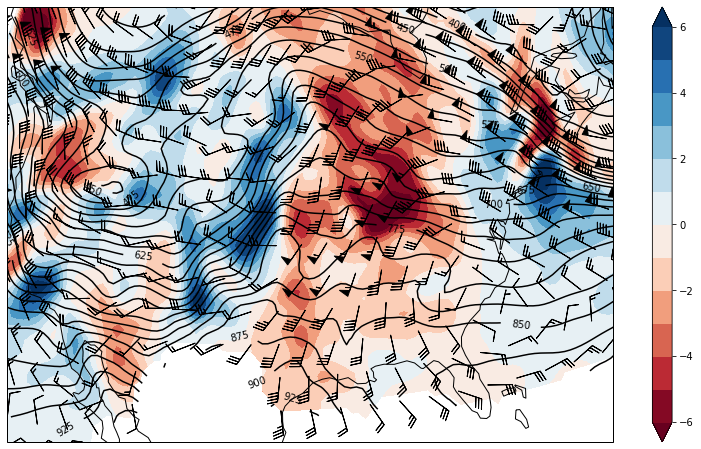

In [39]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal(central_longitude=-100))
ax.add_feature(cfeature.COASTLINE)

levels = np.arange(300, 1000, 25)
cntr = ax.contour(lon, lat, isen_press, transform=data_proj, colors='black', levels=levels)
cntr.clabel(fmt='%d')


lon_slice = slice(None, None, 5)
lat_slice = slice(None, None, 5)
ax.barbs(lon[lon_slice], lat[lat_slice],
         isen_u[lon_slice, lat_slice].to('knots').magnitude,
         isen_v[lon_slice, lat_slice].to('knots').magnitude,
         transform=data_proj, zorder=2)


levels = np.arange(-6, 7)
cs = ax.contourf(lon, lat, lift.to('microbar/s'), levels=levels, cmap='RdBu',
                 transform=data_proj, extend='both')
plt.colorbar(cs)


ax.set_extent((-120, -70, 25, 55), crs=data_proj)